### AI Text Detection Project

Setup cell

In [1]:
print("Starting setup...")

# 1. Check hardware
print("\nChecking GPU...")
import torch
print(f"   CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"   GPU: {torch.cuda.get_device_name(0)}")

# 2. Install packages
print("\nInstalling packages...")
!pip install -q transformers datasets accelerate sentencepiece
!pip install -q scikit-learn matplotlib seaborn pandas
print("Packages installed")

# 3. Mount Google Drive
print("\nMounting Google Drive...")
from google.colab import drive
drive.mount('/content/drive')
print("   ✅ Drive mounted")

# 4. Import libraries
print("\nImporting libraries...")
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import os
import pickle
print("Libraries imported")

# 5. Set project directory
print("\nSetting project directory...")
project_dir = '/content/drive/MyDrive/ai_detection_project'
os.chdir(project_dir)
print(f"Working in: {os.getcwd()}")

# 6. Load GPT-2 model
print("\nLoading GPT-2 model...")
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
print(f"Model loaded on {device}")

# 7. Define helper functions
print("\nLoading helper functions...")

def calculate_perplexity(text, model, tokenizer, device):
    """Calculate perplexity of text"""
    encodings = tokenizer(text, return_tensors='pt')
    input_ids = encodings.input_ids.to(device)

    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
        loss = outputs.loss

    perplexity = torch.exp(loss)
    return perplexity.item()

print("   ✅ Functions defined")

Starting setup...

Checking GPU...
   CUDA available: True
   GPU: Tesla T4

Installing packages...
Packages installed

Mounting Google Drive...
Mounted at /content/drive
   ✅ Drive mounted

Importing libraries...
Libraries imported

Setting project directory...
Working in: /content/drive/MyDrive/ai_detection_project

Loading GPT-2 model...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Model loaded on cuda

Loading helper functions...
   ✅ Functions defined


In [6]:
import os

# Define your project folder path
project_dir = '/content/drive/MyDrive/ai_detection_project'

# Create main folder and subfolders
folders = [
    project_dir,
    f'{project_dir}/data',           # Store datasets here
    f'{project_dir}/models',         # Store trained models here
    f'{project_dir}/results',        # Store experiment results here
    f'{project_dir}/notebooks',      # Store Colab notebooks here
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)

print("✅ Project folder structure created!")
print(f"\nYour project is at: {project_dir}")
print("\nFolder structure:")
print("📁 ai_detection_project/")
print("  ├── 📁 data/         (datasets)")
print("  ├── 📁 models/       (trained models)")
print("  ├── 📁 results/      (experiment results)")
print("  └── 📁 notebooks/    (your notebooks)")

# Change to project directory
os.chdir(project_dir)
print(f"\n✅ Working directory changed to: {os.getcwd()}")

✅ Project folder structure created!

Your project is at: /content/drive/MyDrive/ai_detection_project

Folder structure:
📁 ai_detection_project/
  ├── 📁 data/         (datasets)
  ├── 📁 models/       (trained models)
  ├── 📁 results/      (experiment results)
  └── 📁 notebooks/    (your notebooks)

✅ Working directory changed to: /content/drive/MyDrive/ai_detection_project


Load GPT-2 Model

In [7]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

print("Loading GPT-2 model... (takes ~30 seconds)")
print("This downloads the model from Hugging Face servers\n")

# Load the model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Move model to GPU (if available)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

print(f"✅ GPT-2 loaded successfully!")
print(f"   Model is on: {device.upper()}")
print(f"   Model size: ~500 MB")
print(f"   Parameters: ~117 million")

Loading GPT-2 model... (takes ~30 seconds)
This downloads the model from Hugging Face servers



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

✅ GPT-2 loaded successfully!
   Model is on: CUDA
   Model size: ~500 MB
   Parameters: ~117 million


Generating text ( Testing the model )

In [8]:
# Starting prompt
prompt = "Once upon a time"

print(f"Prompt: '{prompt}'")
print("\nGenerating text...\n")

# Convert text to numbers
inputs = tokenizer(prompt, return_tensors='pt').to(device)

# Generate text
outputs = model.generate(
    **inputs,
    max_length=50,      # Generate up to 50 tokens
    num_return_sequences=1,  # Generate 1 sequence
    temperature=0.7,    # Creativity (0.7 = balanced)
    do_sample=True,     # Use sampling (more creative)
    pad_token_id=tokenizer.eos_token_id  # Avoid warnings
)

# Convert numbers back to text (detokenize)
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("GENERATED TEXT:")
print(generated_text)

Prompt: 'Once upon a time'

Generating text...

GENERATED TEXT:
Once upon a time, the sun had cast its shadow over the earth, and the stars had vanished.

A star called Sirius, Sirius in fact, had vanished because it was lost and had been destroyed by the fire of Sirius.




Calculating Perplexity

In [9]:
import torch

def calculate_perplexity(text, model, tokenizer, device):

    # Tokenize the text
    encodings = tokenizer(text, return_tensors='pt')

    # Move to GPU
    input_ids = encodings.input_ids.to(device)

    # Get the model's prediction
    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
        loss = outputs.loss

    # Perplexity = e^loss
    perplexity = torch.exp(loss)

    return perplexity.item()


# Test with different texts
print("TESTING PERPLEXITY")

# Test 1: AI-generated text
ai_text = generated_text
ai_perplexity = calculate_perplexity(ai_text, model, tokenizer, device)

# Test 2: Human-written text
human_text = """The old man sat by the window, watching the rain. He remembered
when he was young, running through puddles without a care. Those days were gone now,
but the memories remained."""

human_perplexity = calculate_perplexity(human_text, model, tokenizer, device)

# Test 3: Very formal/unusual text
formal_text = """Pursuant to the aforementioned regulations, the committee shall
convene forthwith to deliberate upon the matters herein described."""

formal_perplexity = calculate_perplexity(formal_text, model, tokenizer, device)

# Print results
print(f"\n RESULTS:\n")
print(f"1. AI-Generated Text:")
print(f"   Perplexity: {ai_perplexity:.2f}")
print(f"   Text: {ai_text[:80]}...")
print()

print(f"2. Human-Written Text:")
print(f"   Perplexity: {human_perplexity:.2f}")
print(f"   Text: {human_text[:80]}...")
print()

print(f"3. Formal/Unusual Text:")
print(f"   Perplexity: {formal_perplexity:.2f}")
print(f"   Text: {formal_text[:80]}...")

print("\n")
print("INTERPRETATION:")
print("• Lower perplexity = model finds text more predictable")
print("• Higher perplexity = model finds text more surprising")
print("• AI text often has LOWER perplexity (more predictable)")
print("• Human text often has HIGHER perplexity (more creative/varied)")

`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


TESTING PERPLEXITY

 RESULTS:

1. AI-Generated Text:
   Perplexity: 13.77
   Text: Once upon a time, the sun had cast its shadow over the earth, and the stars had ...

2. Human-Written Text:
   Perplexity: 32.35
   Text: The old man sat by the window, watching the rain. He remembered
when he was youn...

3. Formal/Unusual Text:
   Perplexity: 46.58
   Text: Pursuant to the aforementioned regulations, the committee shall
convene forthwit...


INTERPRETATION:
• Lower perplexity = model finds text more predictable
• Higher perplexity = model finds text more surprising
• AI text often has LOWER perplexity (more predictable)
• Human text often has HIGHER perplexity (more creative/varied)


In [10]:
# Save the notebook to your Drive
from google.colab import files
import os

# Create a results file
results_file = '/content/drive/MyDrive/ai_detection_project/results/initial_test_results.txt'

with open(results_file, 'w') as f:
    f.write("AI TEXT DETECTION PROJECT - INITIAL TESTS\n")
    f.write("=" * 60 + "\n\n")
    f.write(f"AI Text Perplexity: {ai_perplexity:.2f}\n")
    f.write(f"Human Text Perplexity: {human_perplexity:.2f}\n")
    f.write(f"Formal Text Perplexity: {formal_perplexity:.2f}\n\n")
    f.write("Hardware Used:\n")
    f.write(f"  - GPU: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'None'}\n")
    f.write(f"  - Device: {device}\n")

print("Results saved to:")
print(results_file)

Results saved to:
/content/drive/MyDrive/ai_detection_project/results/initial_test_results.txt


Testing different text types

In [14]:
import torch
import numpy as np

tokenizer.pad_token = tokenizer.eos_token

def calculate_perplexity(text, model, tokenizer, device):
    encodings = tokenizer(
        text,
        return_tensors='pt',
        truncation=True,
        max_length=512
    )

    input_ids = encodings.input_ids.to(device)

    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
        loss = outputs.loss

    perplexity = torch.exp(loss)
    return perplexity.item()

print("=" * 60)
print("DAY 2 EXPLORATION")
print("=" * 60)

# Test 1: Short AI
print("\n1. Short AI text...")
short_inputs = tokenizer("Hello", return_tensors='pt').to(device)
short_ai = model.generate(
    **short_inputs,
    max_length=15,
    do_sample=True,
    temperature=0.7,
    pad_token_id=tokenizer.eos_token_id
)
short_ai_text = tokenizer.decode(short_ai[0], skip_special_tokens=True)
short_ai_ppl = calculate_perplexity(short_ai_text, model, tokenizer, device)
print(f"   PPL: {short_ai_ppl:.2f}")
print(f"   Text: {short_ai_text}")

# Test 2: Creative AI (high temperature)
print("\n2. Creative AI text (temp=1.5)...")
creative_inputs = tokenizer("Once upon a time", return_tensors='pt').to(device)
creative_ai = model.generate(
    **creative_inputs,
    max_length=50,
    do_sample=True,
    temperature=1.5,
    pad_token_id=tokenizer.eos_token_id,
    top_k=50
)
creative_ai_text = tokenizer.decode(creative_ai[0], skip_special_tokens=True)
creative_ai_ppl = calculate_perplexity(creative_ai_text, model, tokenizer, device)
print(f"   PPL: {creative_ai_ppl:.2f}")
print(f"   Text: {creative_ai_text}")

# Test 3: Boring human
print("\n3. Boring human text...")
boring_human = "The meeting is scheduled for Monday at 9 AM. Please bring your reports. Thank you."
boring_human_ppl = calculate_perplexity(boring_human, model, tokenizer, device)
print(f"   PPL: {boring_human_ppl:.2f}")
print(f"   Text: {boring_human}")

# Test 4: Creative human
print("\n4. Creative human text...")
creative_human = "Moonlight dripped like honey through the fractured skylight, pooling in the dusty corners where forgotten dreams dozed."
creative_human_ppl = calculate_perplexity(creative_human, model, tokenizer, device)
print(f"   PPL: {creative_human_ppl:.2f}")
print(f"   Text: {creative_human}")

# Test 5: Normal AI
print("\n5. Normal AI text (temp=0.7)...")
normal_inputs = tokenizer("Once upon a time", return_tensors='pt').to(device)
normal_ai = model.generate(
    **normal_inputs,
    max_length=50,
    do_sample=True,
    temperature=0.7,
    pad_token_id=tokenizer.eos_token_id
)
normal_ai_text = tokenizer.decode(normal_ai[0], skip_special_tokens=True)
normal_ai_ppl = calculate_perplexity(normal_ai_text, model, tokenizer, device)
print(f"   PPL: {normal_ai_ppl:.2f}")
print(f"   Text: {normal_ai_text}")

# Test 6: Normal human
print("\n6. Normal human text...")
normal_human = "The old man sat by the window, watching the rain. He remembered when he was young, running through puddles without a care. Those days were gone now, but the memories remained."
normal_human_ppl = calculate_perplexity(normal_human, model, tokenizer, device)
print(f"   PPL: {normal_human_ppl:.2f}")
print(f"   Text: {normal_human}")

# Summary
print("SUMMARY")

results = {
    'Short AI': short_ai_ppl,
    'Normal AI (temp=0.7)': normal_ai_ppl,
    'Creative AI (temp=1.5)': creative_ai_ppl,
    'Boring Human': boring_human_ppl,
    'Normal Human': normal_human_ppl,
    'Creative Human': creative_human_ppl
}

sorted_results = sorted(results.items(), key=lambda x: x[1])

print("\nPerplexity Rankings (Low to High):")
for i, (text_type, ppl) in enumerate(sorted_results, 1):
    print(f"   {i}. {text_type:25} PPL = {ppl:.2f}")

# Range analysis
ai_range = [short_ai_ppl, normal_ai_ppl, creative_ai_ppl]
human_range = [boring_human_ppl, normal_human_ppl, creative_human_ppl]

ai_min, ai_max = min(ai_range), max(ai_range)
human_min, human_max = min(human_range), max(human_range)

print(f"\nAI range:    [{ai_min:.2f}, {ai_max:.2f}]")
print(f"Human range: [{human_min:.2f}, {human_max:.2f}]")

has_overlap = ai_max > human_min and human_max > ai_min
if has_overlap:
    overlap_start = max(ai_min, human_min)
    overlap_end = min(ai_max, human_max)
    print(f"Overlap:     [{overlap_start:.2f}, {overlap_end:.2f}]")
else:
    print(f"Overlap:     None")

# Save
observations = {
    'short_ai': {'text': short_ai_text, 'ppl': short_ai_ppl},
    'normal_ai': {'text': normal_ai_text, 'ppl': normal_ai_ppl},
    'creative_ai': {'text': creative_ai_text, 'ppl': creative_ai_ppl},
    'boring_human': {'text': boring_human, 'ppl': boring_human_ppl},
    'normal_human': {'text': normal_human, 'ppl': normal_human_ppl},
    'creative_human': {'text': creative_human, 'ppl': creative_human_ppl},
    'has_overlap': has_overlap
}

import pickle
with open('/content/drive/MyDrive/ai_detection_project/results/day2_observations.pkl', 'wb') as f:
    pickle.dump(observations, f)

with open('/content/drive/MyDrive/ai_detection_project/results/day2_observations.txt', 'w') as f:
    f.write("DAY 2 EXPLORATION RESULTS\n")
    f.write("=" * 60 + "\n\n")
    for text_type, ppl in sorted_results:
        f.write(f"{text_type:25} PPL = {ppl:.2f}\n")
    f.write(f"\nAI Range: [{ai_min:.2f}, {ai_max:.2f}]\n")
    f.write(f"Human Range: [{human_min:.2f}, {human_max:.2f}]\n")
    f.write(f"Overlap: {'Yes' if has_overlap else 'No'}\n")

print(f"\n✅ Saved results")
print("=" * 60)

DAY 2 EXPLORATION

1. Short AI text...
   PPL: 6.06
   Text: Hello-yours,

I am sorry for the inconvenience.


2. Creative AI text (temp=1.5)...
   PPL: 39.57
   Text: Once upon a time, even the man who possessed his own spirit and sent him, if only I knew and called forth for help, would be beaten. The sword that I wields now kills, and he finds no place for himself. After all

3. Boring human text...
   PPL: 23.44
   Text: The meeting is scheduled for Monday at 9 AM. Please bring your reports. Thank you.

4. Creative human text...
   PPL: 225.47
   Text: Moonlight dripped like honey through the fractured skylight, pooling in the dusty corners where forgotten dreams dozed.

5. Normal AI text (temp=0.7)...
   PPL: 9.98
   Text: Once upon a time, the light of the sun shone, and the moon set against the horizon, and the stars were spread out like stars. And then, behold, a pillar of flame was cast upon the earth, and its face was filled with

6. Normal human text...
   PPL: 19.56
   Text

Generating 20 AI samples...
  AI 1: PPL = 11.69
  AI 2: PPL = 11.97
  AI 3: PPL = 15.03
  AI 4: PPL = 8.67
  AI 5: PPL = 14.18
  AI 6: PPL = 17.87
  AI 7: PPL = 8.46
  AI 8: PPL = 11.73
  AI 9: PPL = 8.25
  AI 10: PPL = 14.59
  AI 11: PPL = 14.37
  AI 12: PPL = 8.94
  AI 13: PPL = 16.34
  AI 14: PPL = 10.17
  AI 15: PPL = 9.70
  AI 16: PPL = 11.34
  AI 17: PPL = 11.57
  AI 18: PPL = 8.98
  AI 19: PPL = 11.79
  AI 20: PPL = 15.22

Calculating human text perplexities...
  Human 1: PPL = 27.09
  Human 2: PPL = 36.82
  Human 3: PPL = 36.60
  Human 4: PPL = 11.40
  Human 5: PPL = 145.08
  Human 6: PPL = 35.40
  Human 7: PPL = 39.96
  Human 8: PPL = 28.96
  Human 9: PPL = 98.78
  Human 10: PPL = 21.50
  Human 11: PPL = 49.56
  Human 12: PPL = 33.78
  Human 13: PPL = 24.43
  Human 14: PPL = 83.47
  Human 15: PPL = 77.38
  Human 16: PPL = 30.88
  Human 17: PPL = 58.56
  Human 18: PPL = 59.44
  Human 19: PPL = 118.03
  Human 20: PPL = 284.88

STATISTICAL ANALYSIS

📊 AI Text Statistics:
   Mean 

/tmp/ipython-input-3256557812.py:204: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_to_plot, labels=['AI Text', 'Human Text'],



✅ Visualization saved!


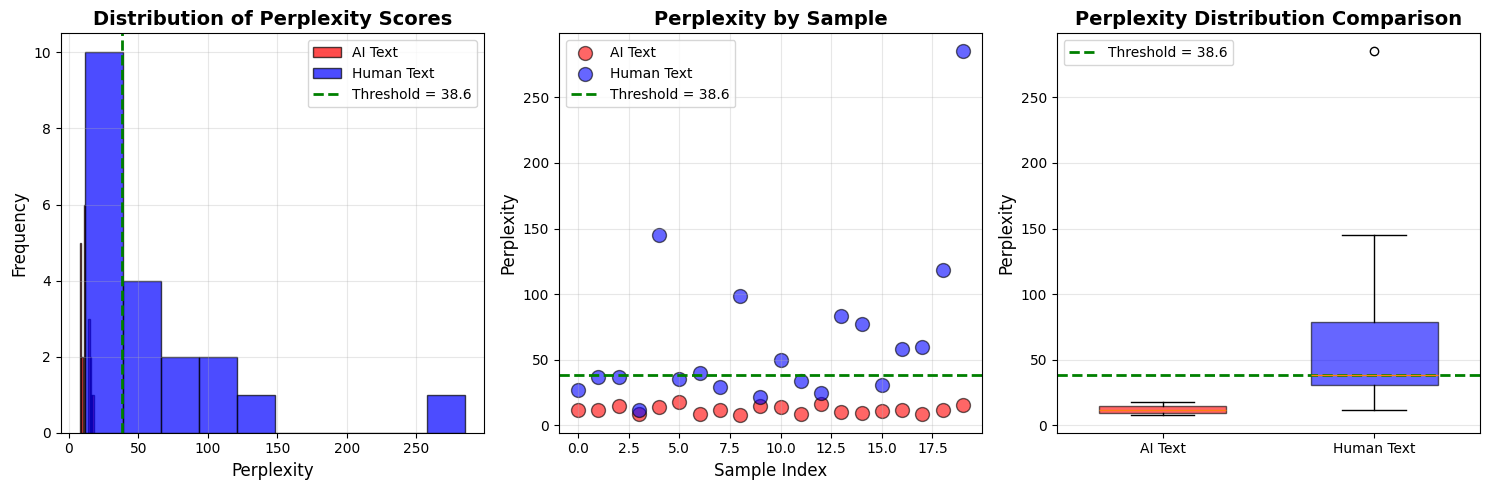


SAVING RESULTS
✅ Results saved to Drive!


KEY INSIGHTS

1. SEPARATION:
 Excellent separation! Human PPL is 2x+ higher than AI

2. ACCURACY WITH SIMPLE THRESHOLD:
  Good! 75.0% accuracy - promising start

3. OVERLAP:
 AI and human ranges overlap


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# FIX: Add padding token to tokenizer
tokenizer.pad_token = tokenizer.eos_token

# FIXED calculate_perplexity function
def calculate_perplexity(text, model, tokenizer, device):
    """Calculate perplexity of text"""
    # Tokenize
    encodings = tokenizer(
        text,
        return_tensors='pt',
        truncation=True,
        max_length=512  # Limit length to avoid issues
    )

    input_ids = encodings.input_ids.to(device)

    # Calculate perplexity
    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
        loss = outputs.loss

    perplexity = torch.exp(loss)
    return perplexity.item()

# Generate 20 AI texts
ai_perplexities = []
ai_texts = []

print("Generating 20 AI samples...")
prompts = ["Once upon a time", "In the future", "The story begins",
           "Long ago", "In a distant land", "The adventure started",
           "Many years ago", "In a world where", "It all began",
           "There once was"]

for i in range(20):
    prompt = prompts[i % len(prompts)]  # Cycle through prompts

    # Generate text
    inputs = tokenizer(prompt, return_tensors='pt').to(device)

    outputs = model.generate(
        **inputs,
        max_length=np.random.randint(40, 80),
        do_sample=True,
        temperature=0.7,
        pad_token_id=tokenizer.eos_token_id,
        no_repeat_ngram_size=2  # Avoid repetition
    )

    text = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Calculate perplexity
    ppl = calculate_perplexity(text, model, tokenizer, device)

    ai_perplexities.append(ppl)
    ai_texts.append(text)

    print(f"  AI {i+1}: PPL = {ppl:.2f}")

# Human-written examples (realistic casual text)
human_texts = [
    "I walked to the store yesterday. The weather was nice. I bought some milk and eggs.",
    "My favorite hobby is reading. I especially enjoy science fiction novels.",
    "The conference starts next Monday. Make sure to register in advance.",
    "She laughed at the joke, but I didn't find it funny at all.",
    "The mountain trail was steep. We took breaks every twenty minutes.",
    "Pizza is my comfort food. I order it every Friday night without fail.",
    "The concert was amazing. The band played all their hit songs.",
    "I need to finish this report by tomorrow. It's already quite late.",
    "The garden looks beautiful in spring. Flowers bloom everywhere.",
    "He finally admitted he was wrong. That took a lot of courage.",
    "The old house creaked in the wind. It was slightly unsettling.",
    "Coffee helps me wake up. I drink two cups every morning.",
    "The movie was disappointing. The plot made no sense at all.",
    "She adopted a rescue dog. They became best friends immediately.",
    "Traffic was terrible today. My commute took twice as long.",
    "The restaurant had excellent reviews. We decided to try it out.",
    "Learning guitar is harder than I thought. My fingers hurt constantly.",
    "The sunset looked incredible. We stopped to take some photos.",
    "He forgot his keys again. This happens at least once weekly.",
    "The book club meets monthly. We discuss contemporary fiction mostly."
]

human_perplexities = []

print("\nCalculating human text perplexities...")
for i, text in enumerate(human_texts):
    ppl = calculate_perplexity(text, model, tokenizer, device)
    human_perplexities.append(ppl)
    print(f"  Human {i+1}: PPL = {ppl:.2f}")

# Statistical analysis
print("\n" + "=" * 60)
print("STATISTICAL ANALYSIS")
print("=" * 60)

ai_mean = np.mean(ai_perplexities)
ai_std = np.std(ai_perplexities)
ai_min = min(ai_perplexities)
ai_max = max(ai_perplexities)

human_mean = np.mean(human_perplexities)
human_std = np.std(human_perplexities)
human_min = min(human_perplexities)
human_max = max(human_perplexities)

print(f"\n📊 AI Text Statistics:")
print(f"   Mean PPL: {ai_mean:.2f} ± {ai_std:.2f}")
print(f"   Range: [{ai_min:.2f}, {ai_max:.2f}]")

print(f"\n📊 Human Text Statistics:")
print(f"   Mean PPL: {human_mean:.2f} ± {human_std:.2f}")
print(f"   Range: [{human_min:.2f}, {human_max:.2f}]")

print(f"\n📈 Separation:")
print(f"   Difference in means: {human_mean - ai_mean:.2f}")
print(f"   Ratio: {human_mean / ai_mean:.2f}x")

# Check for overlap
overlap_start = max(ai_min, human_min)
overlap_end = min(ai_max, human_max)
has_overlap = overlap_start < overlap_end

print(f"\n🔍 Overlap Analysis:")
if has_overlap:
    print(f"   ⚠️  Ranges overlap from {overlap_start:.2f} to {overlap_end:.2f}")
    print(f"   This means simple threshold won't be 100% accurate!")
else:
    print(f"   ✅ No overlap! Perfect separation possible!")

# Find optimal threshold (midpoint between means)
optimal_threshold = (ai_mean + human_mean) / 2

print(f"\n🎯 Optimal Threshold: {optimal_threshold:.2f}")
print(f"   Rule: PPL < {optimal_threshold:.2f} → AI")
print(f"         PPL > {optimal_threshold:.2f} → Human")

# Calculate accuracy with this threshold
ai_correct = sum(1 for ppl in ai_perplexities if ppl < optimal_threshold)
human_correct = sum(1 for ppl in human_perplexities if ppl > optimal_threshold)

total = len(ai_perplexities) + len(human_perplexities)
correct = ai_correct + human_correct
accuracy = correct / total

# Calculate precision and recall
true_positives = ai_correct  # Correctly identified AI
false_positives = len(human_perplexities) - human_correct  # Human wrongly called AI
false_negatives = len(ai_perplexities) - ai_correct  # AI wrongly called Human
true_negatives = human_correct  # Correctly identified Human

precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\n📊 Performance Metrics:")
print(f"   Accuracy:  {accuracy:.1%}")
print(f"   Precision: {precision:.1%} (of texts flagged as AI, how many were actually AI?)")
print(f"   Recall:    {recall:.1%} (of actual AI texts, how many did we catch?)")
print(f"   F1 Score:  {f1:.3f}")

print(f"\n📈 Breakdown:")
print(f"   AI correctly identified:    {ai_correct}/{len(ai_perplexities)} ({ai_correct/len(ai_perplexities):.1%})")
print(f"   Human correctly identified: {human_correct}/{len(human_perplexities)} ({human_correct/len(human_perplexities):.1%})")
print(f"   AI missed (false negatives): {false_negatives}")
print(f"   Human misclassified (false positives): {false_positives}")

# Visualization
plt.figure(figsize=(15, 5))

# Plot 1: Histogram
plt.subplot(1, 3, 1)
plt.hist(ai_perplexities, bins=10, alpha=0.7, label='AI Text', color='red', edgecolor='black')
plt.hist(human_perplexities, bins=10, alpha=0.7, label='Human Text', color='blue', edgecolor='black')
plt.axvline(optimal_threshold, color='green', linestyle='--', linewidth=2,
            label=f'Threshold = {optimal_threshold:.1f}')
plt.xlabel('Perplexity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Perplexity Scores', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Scatter plot
plt.subplot(1, 3, 2)
plt.scatter(range(len(ai_perplexities)), ai_perplexities,
            c='red', alpha=0.6, label='AI Text', s=100, edgecolors='black')
plt.scatter(range(len(human_perplexities)), human_perplexities,
            c='blue', alpha=0.6, label='Human Text', s=100, edgecolors='black')
plt.axhline(optimal_threshold, color='green', linestyle='--', linewidth=2,
            label=f'Threshold = {optimal_threshold:.1f}')
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Perplexity', fontsize=12)
plt.title('Perplexity by Sample', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Box plot
plt.subplot(1, 3, 3)
data_to_plot = [ai_perplexities, human_perplexities]
box = plt.boxplot(data_to_plot, labels=['AI Text', 'Human Text'],
                  patch_artist=True, widths=0.6)
box['boxes'][0].set_facecolor('red')
box['boxes'][0].set_alpha(0.6)
box['boxes'][1].set_facecolor('blue')
box['boxes'][1].set_alpha(0.6)
plt.axhline(optimal_threshold, color='green', linestyle='--', linewidth=2,
            label=f'Threshold = {optimal_threshold:.1f}')
plt.ylabel('Perplexity', fontsize=12)
plt.title('Perplexity Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ai_detection_project/results/day2_perplexity_analysis.png',
            dpi=300, bbox_inches='tight')
print(f"\n✅ Visualization saved!")

plt.show()

# Save results
print("\n" + "=" * 60)
print("SAVING RESULTS")
print("=" * 60)

results = {
    'ai_perplexities': ai_perplexities,
    'human_perplexities': human_perplexities,
    'ai_texts': ai_texts,
    'human_texts': human_texts,
    'optimal_threshold': optimal_threshold,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'ai_mean': ai_mean,
    'human_mean': human_mean
}

import pickle
with open('/content/drive/MyDrive/ai_detection_project/results/day2_results.pkl', 'wb') as f:
    pickle.dump(results, f)

# Also save readable summary
with open('/content/drive/MyDrive/ai_detection_project/results/day2_summary.txt', 'w') as f:
    f.write("DAY 2 PERPLEXITY ANALYSIS RESULTS\n")
    f.write("=" * 60 + "\n\n")
    f.write(f"AI Text Statistics:\n")
    f.write(f"  Mean: {ai_mean:.2f} ± {ai_std:.2f}\n")
    f.write(f"  Range: [{ai_min:.2f}, {ai_max:.2f}]\n\n")
    f.write(f"Human Text Statistics:\n")
    f.write(f"  Mean: {human_mean:.2f} ± {human_std:.2f}\n")
    f.write(f"  Range: [{human_min:.2f}, {human_max:.2f}]\n\n")
    f.write(f"Detection Performance:\n")
    f.write(f"  Threshold: {optimal_threshold:.2f}\n")
    f.write(f"  Accuracy: {accuracy:.1%}\n")
    f.write(f"  Precision: {precision:.1%}\n")
    f.write(f"  Recall: {recall:.1%}\n")
    f.write(f"  F1 Score: {f1:.3f}\n\n")
    f.write(f"Overlap: {'Yes' if has_overlap else 'No'}\n")

print("✅ Results saved to Drive!")

# Key insights
print("\n")
print("KEY INSIGHTS")

print("\n1. SEPARATION:")
if human_mean / ai_mean > 2:
    print(" Excellent separation! Human PPL is 2x+ higher than AI")
elif human_mean / ai_mean > 1.5:
    print(" Good separation. Human PPL is 1.5x+ higher than AI")
else:
    print(" Weak separation. Detection will be challenging")

print(f"\n2. ACCURACY WITH SIMPLE THRESHOLD:")
if accuracy > 0.85:
    print(f"  Excellent! {accuracy:.1%} accuracy with just perplexity")
elif accuracy > 0.70:
    print(f"  Good! {accuracy:.1%} accuracy - promising start")
else:
    print(f"  Moderate. {accuracy:.1%} accuracy - need more methods")

print(f"\n3. OVERLAP:")
if has_overlap:
    print(" AI and human ranges overlap")
else:
    print("Perfect separation! No overlap detected")